Modules nécessaires : 

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

from HiggsML.ingestion import Ingestion
from HiggsML.datasets import download_dataset
from sample_code_submission.neural_network import NeuralNetwork
from sys import path
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from itertools import product
from numpy.random import RandomState
import warnings
import os
import sys

warnings.filterwarnings("ignore")

Charger les données : 

In [2]:
data = download_dataset(
    "blackSwan_data"
)  # change to "blackSwan_data" for the actual data

# load train set
data.load_train_set()
data_set = data.get_train_set()

2025-06-05 11:24:33,156 - HiggsML.datasets     - INFO     - Handling as dataset name: blackSwan_data
2025-06-05 11:24:33,156 - HiggsML.datasets     - INFO     - Current working directory: c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A
2025-06-05 11:24:33,156 - HiggsML.datasets     - INFO     - Total rows: 2000000
2025-06-05 11:24:33,156 - HiggsML.datasets     - INFO     - Test size: 600000
2025-06-05 11:24:33,332 - HiggsML.datasets     - INFO     - Selected train size: 1400000
2025-06-05 11:24:34,393 - HiggsML.datasets     - INFO     - Data loaded successfully


In [3]:
target = data_set["labels"]
weights = data_set["weights"]
detailed_label = data_set["detailed_labels"]
keys = np.unique(detailed_label)

Direction

In [4]:
root_dir = os.getcwd()
print("Root directory is", root_dir)
submission_dir = os.path.join(root_dir, "sample_code_submission")

# The directory where results and other outputs from the participant's code will be written
output_dir = os.path.join(root_dir, "sample_result_submission")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Root directory is c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A


Import Submission Model

In [5]:
path.append(submission_dir)
from model import Model

Testing Settings

In [6]:
TEST_SETTINGS = {
    "systematics": {  # Systematics to use
        "tes": False,  # tau energy scale
        "jes": False,  # jet energy scale
        "soft_met": False,  # soft term in MET
        "ttbar_scale": False,  # W boson scale factor
        "diboson_scale": False,  # Diboson scale factor
        "bkg_scale": False,  # Background scale factor
    },
    "num_pseudo_experiments": 25,  # Number of pseudo-experiments to run per set
    "num_of_sets": 25,  # Number of sets of pseudo-experiments to run
}

RANDOM_SEED = 42


In [7]:
test_settings = TEST_SETTINGS.copy()

random_state = np.random.RandomState(RANDOM_SEED)
test_settings["ground_truth_mus"] = (
    random_state.uniform(0.1, 3, test_settings["num_of_sets"])
).tolist()

random_settings_file = os.path.join(output_dir, "test_settings.json")
with open(random_settings_file, "w") as f:
    json.dump(test_settings, f)

Boucle sur "Ingestion" en faisant varier epochs

Graphique

In [8]:
def graphique(S, E):
    plt.plot(S, E, marker='o', linestyle='-', color='b')
    plt.title('Significance en fonction de epochs')
    plt.xlabel('significance')
    plt.ylabel('epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

Calcul AUC : 

Significance

In [9]:

def optimization(train_data): 
    L_epochs = np.linspace(6, 15, 10)
    sigmax = 0
    epochs_max = 1
    S = []
    E = []
    for k in range(len(L_epochs)):
        ingestion = Ingestion(data)
        # initialize submission
        ingestion.init_submission(Model, "NN")
        ingestion.model.model.epochs = int(L_epochs[k])
        print(ingestion.model.model.epochs)
        ingestion.fit_submission()
        sig1 = ingestion.model.sig
        print(sig1)
        #visualisation des données :
        S.append(sig1)
        E.append(int(L_epochs[k]))
        if sig1>sigmax: 
            sigmax = sig1
            epochs_max = int(L_epochs[k])
    graphique(E, S)
    return sigmax, epochs_max



Il y a plusieurs problématique : 
Comment modifier une variable epochs de notre 

test_labels=ingestion.model.training_set["labels"],test_weights=ingestion.model.training_set["weights"]

Lancement de la boucle

A l'aide des autres programmes d'optimisations, on a obtenu batchsize : 120, 

2025-06-05 11:24:35,821 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 11:24:35,821 - HiggsML.datasets     - INFO     - Selected train size: 50000
2025-06-05 11:24:36,238 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:24:36,256 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  678.0400323698951
sum_bkg_weights:  105040.95996763014


2025-06-05 11:24:36,676 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:24:36,704 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  670.7995058840161
sum_bkg_weights:  105048.200494116


2025-06-05 11:24:37,205 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:24:37,334 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  671.3534163838535
sum_bkg_weights:  105047.64658361617
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
6
Epoch 1/6
3125/3125 - 7s - 2ms/step - accuracy: 0.7919 - loss: 2.0061
Epoch 2/6
3125/3125 - 6s - 2ms/step - accuracy: 0.8084 - loss: 1.9062
Epoch 3/6
3125/3125 - 6s - 2ms/step - accuracy: 0.8132 - loss: 1.8817
Epoch 4/6
3125/3125 - 6s - 2ms/step - accuracy: 0.8155 - loss: 1.8644
Epoch 5/6
3125/3125 - 6s - 2ms/step - accuracy: 0.8167 - loss: 1.8497
Epoch 6/6
3125/3125 - 6s - 2ms/step - accuracy: 0.8193 - loss: 1.8388
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45846,)
score shape after threshold (45846,)
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step
saved_info {'beta': np.float64(14522.842193441727), 'gamma': np.float64(483.28325006795353), 'tes_fit': <function tes_fitter.<locals>.fit_funct

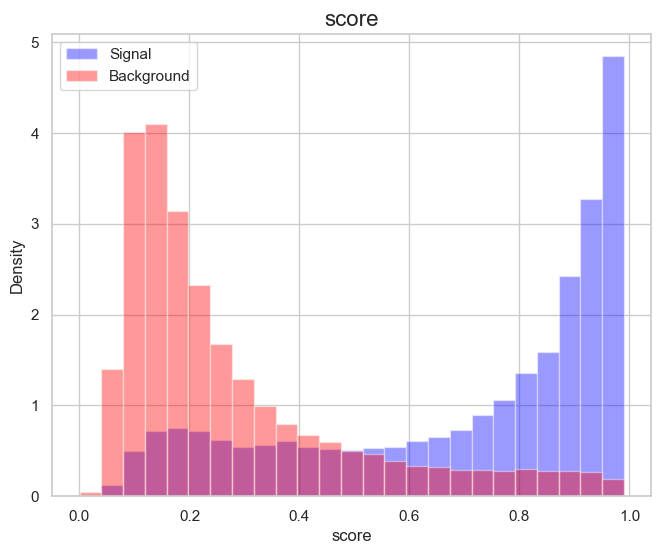

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


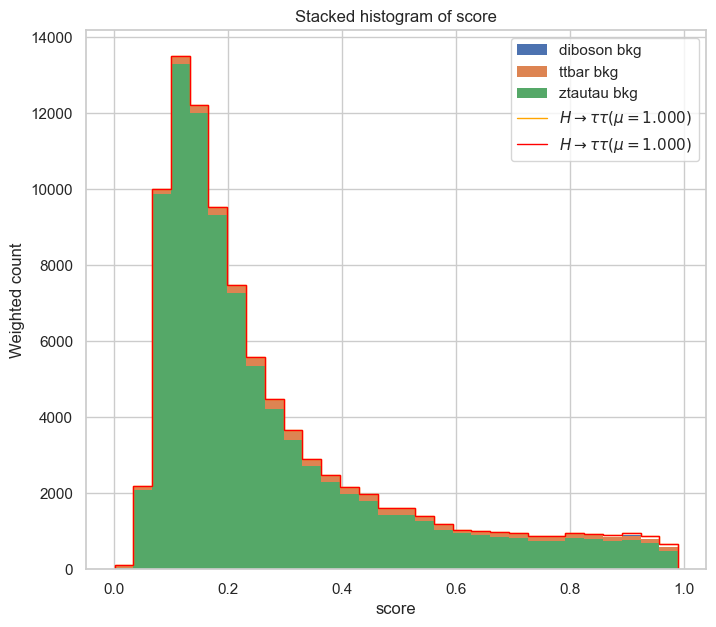

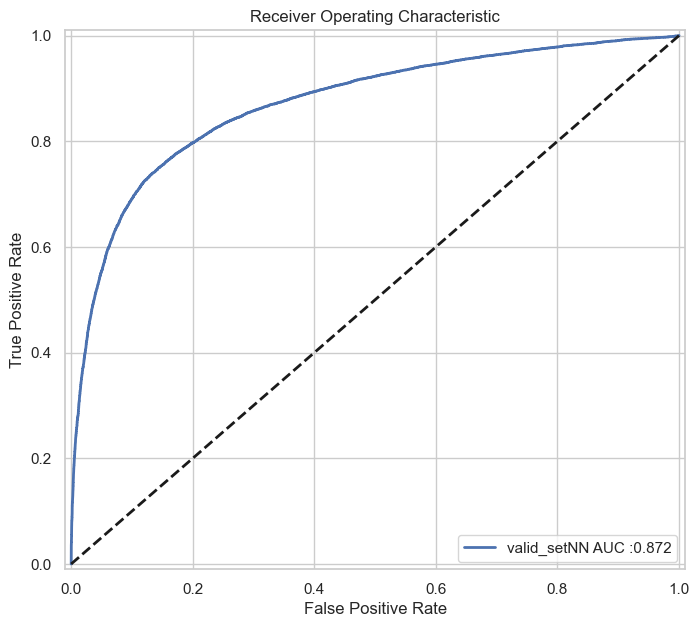

2025-06-05 11:25:28,027 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 11:25:28,027 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.072325110504962


2025-06-05 11:25:28,444 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:25:28,460 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  672.0677478591965
sum_bkg_weights:  105046.93225214079


2025-06-05 11:25:28,813 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:25:28,846 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  680.9516673592767
sum_bkg_weights:  105038.04833264073


2025-06-05 11:25:29,200 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:25:29,255 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  667.2048379285305
sum_bkg_weights:  105051.7951620715
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
7
Epoch 1/7
3125/3125 - 7s - 2ms/step - accuracy: 0.7871 - loss: 2.0204
Epoch 2/7
3125/3125 - 6s - 2ms/step - accuracy: 0.8085 - loss: 1.9170
Epoch 3/7
3125/3125 - 6s - 2ms/step - accuracy: 0.8160 - loss: 1.8901
Epoch 4/7
3125/3125 - 6s - 2ms/step - accuracy: 0.8159 - loss: 1.8724
Epoch 5/7
3125/3125 - 6s - 2ms/step - accuracy: 0.8183 - loss: 1.8605
Epoch 6/7
3125/3125 - 6s - 2ms/step - accuracy: 0.8179 - loss: 1.8520
Epoch 7/7
3125/3125 - 6s - 2ms/step - accuracy: 0.8193 - loss: 1.8420
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45882,)
score shape after threshold (45882,)
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
saved_info {'beta': np.float64(13976.088375961357), 'gamma': np.float64(478.74

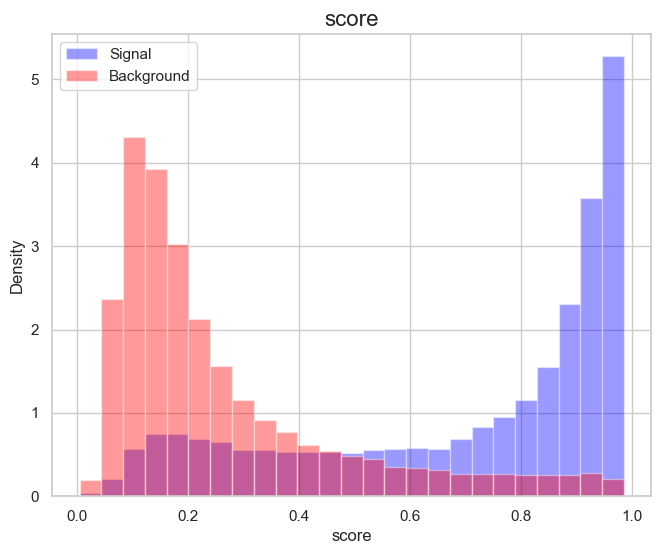

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


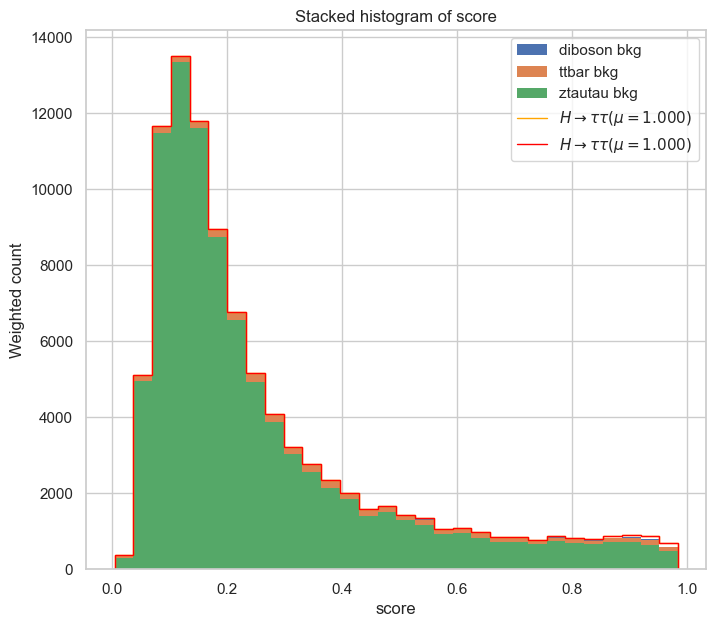

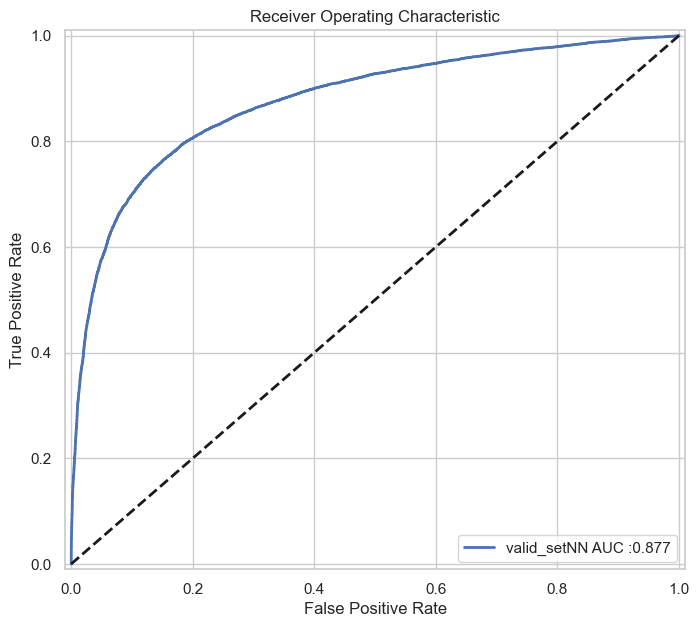

2025-06-05 11:26:25,484 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 11:26:25,484 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.0587590751707463


2025-06-05 11:26:25,871 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:26:25,903 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  664.8482281379605
sum_bkg_weights:  105054.15177186202


2025-06-05 11:26:26,303 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:26:26,335 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  678.6382889447224
sum_bkg_weights:  105040.36171105529


2025-06-05 11:26:26,736 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:26:26,795 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  676.7447548213869
sum_bkg_weights:  105042.25524517863
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
8
Epoch 1/8
3125/3125 - 7s - 2ms/step - accuracy: 0.7910 - loss: 2.0099
Epoch 2/8
3125/3125 - 6s - 2ms/step - accuracy: 0.8100 - loss: 1.9074
Epoch 3/8
3125/3125 - 6s - 2ms/step - accuracy: 0.8144 - loss: 1.8807
Epoch 4/8
3125/3125 - 6s - 2ms/step - accuracy: 0.8158 - loss: 1.8653
Epoch 5/8
3125/3125 - 6s - 2ms/step - accuracy: 0.8177 - loss: 1.8531
Epoch 6/8
3125/3125 - 6s - 2ms/step - accuracy: 0.8189 - loss: 1.8385
Epoch 7/8
3125/3125 - 6s - 2ms/step - accuracy: 0.8195 - loss: 1.8298
Epoch 8/8
3125/3125 - 6s - 2ms/step - accuracy: 0.8203 - loss: 1.8227
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step
score shape before threshold (45873,)
score shape after threshold (45873,)
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
sav

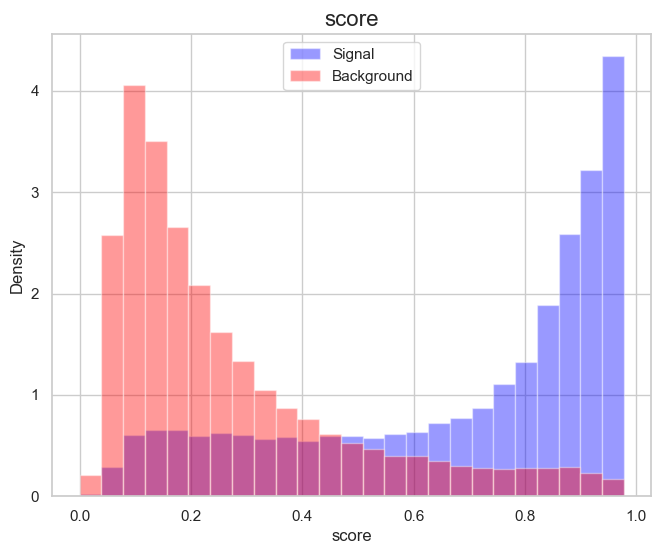

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


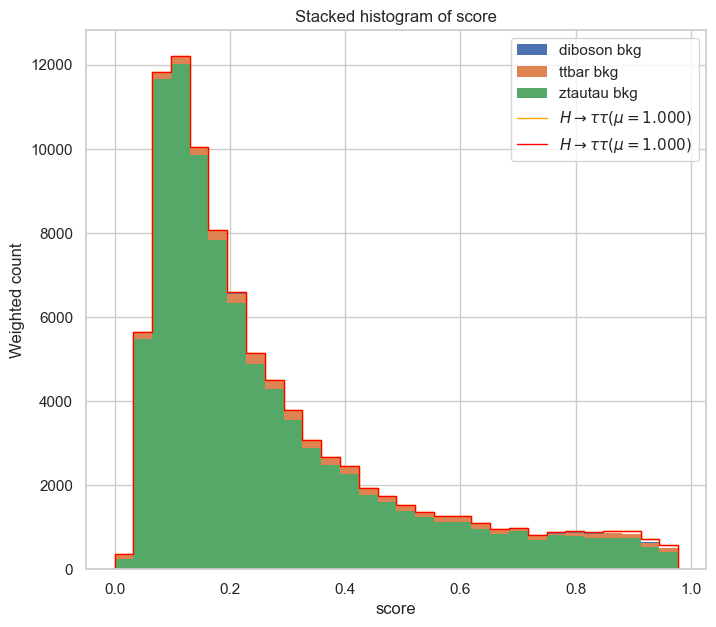

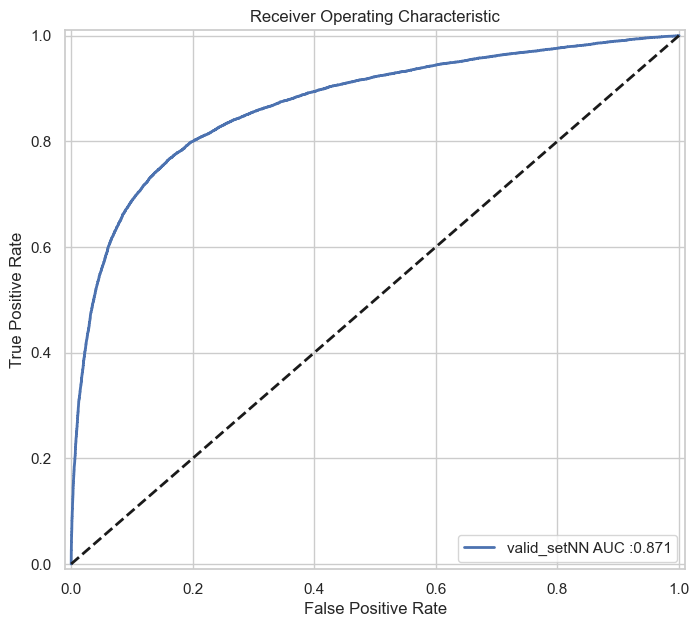

2025-06-05 11:27:27,343 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 11:27:27,358 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.081743141418291


2025-06-05 11:27:27,714 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:27:27,729 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  667.4660865710523
sum_bkg_weights:  105051.53391342892


2025-06-05 11:27:28,094 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:27:28,117 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  672.6918925990286
sum_bkg_weights:  105046.30810740092


2025-06-05 11:27:28,460 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:27:28,521 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  680.0578837528543
sum_bkg_weights:  105038.94211624714
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
9
Epoch 1/9
3125/3125 - 7s - 2ms/step - accuracy: 0.7897 - loss: 2.0152
Epoch 2/9
3125/3125 - 6s - 2ms/step - accuracy: 0.8093 - loss: 1.9117
Epoch 3/9
3125/3125 - 6s - 2ms/step - accuracy: 0.8132 - loss: 1.8855
Epoch 4/9
3125/3125 - 6s - 2ms/step - accuracy: 0.8168 - loss: 1.8681
Epoch 5/9
3125/3125 - 6s - 2ms/step - accuracy: 0.8179 - loss: 1.8510
Epoch 6/9
3125/3125 - 6s - 2ms/step - accuracy: 0.8189 - loss: 1.8457
Epoch 7/9
3125/3125 - 6s - 2ms/step - accuracy: 0.8203 - loss: 1.8352
Epoch 8/9
3125/3125 - 6s - 2ms/step - accuracy: 0.8208 - loss: 1.8266
Epoch 9/9
3125/3125 - 6s - 2ms/step - accuracy: 0.8221 - loss: 1.8186
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step
score shape before threshold (45857,)
score shape after threshold (45857,)
1434/1434 ━━━━━━━━━━━

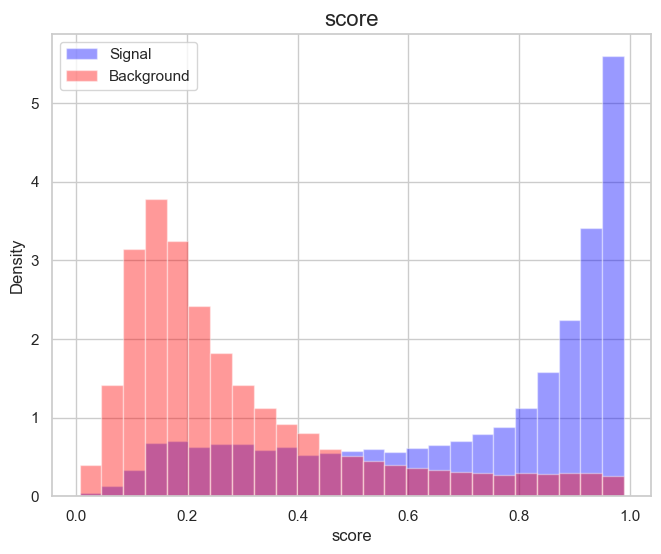

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


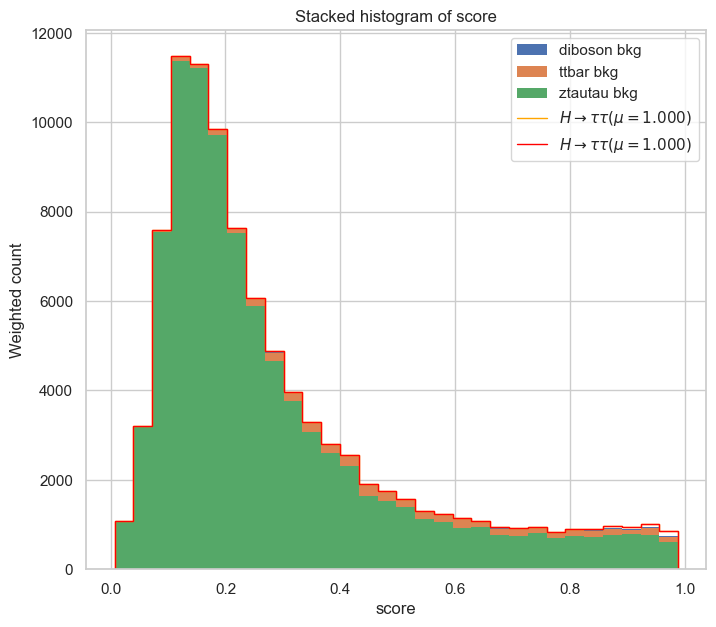

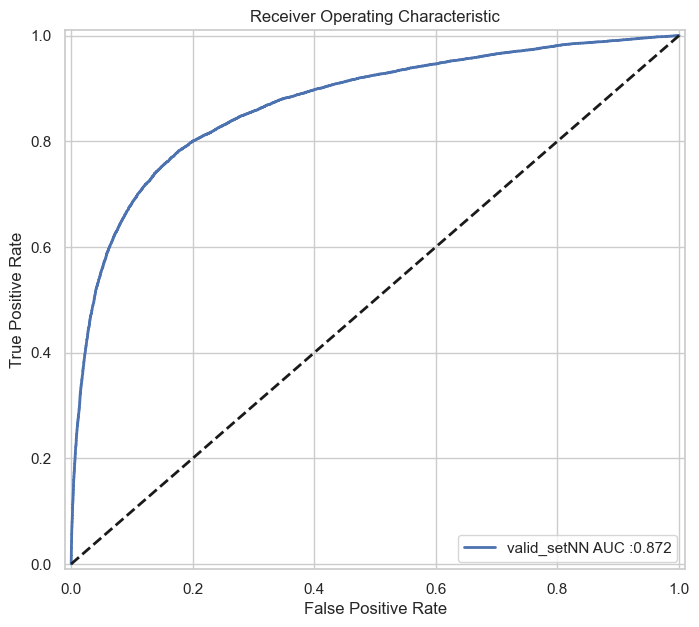

2025-06-05 11:28:34,715 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 11:28:34,724 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.0969408217513674


2025-06-05 11:28:35,095 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:28:35,102 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  682.3492942392917
sum_bkg_weights:  105036.6507057607


2025-06-05 11:28:35,484 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:28:35,500 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  667.1346449517011
sum_bkg_weights:  105051.86535504828


2025-06-05 11:28:35,849 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:28:35,920 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  670.7544780235543
sum_bkg_weights:  105048.24552197645
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
10
Epoch 1/10
3125/3125 - 8s - 2ms/step - accuracy: 0.7915 - loss: 2.0144
Epoch 2/10
3125/3125 - 6s - 2ms/step - accuracy: 0.8076 - loss: 1.9132
Epoch 3/10
3125/3125 - 6s - 2ms/step - accuracy: 0.8128 - loss: 1.8885
Epoch 4/10
3125/3125 - 6s - 2ms/step - accuracy: 0.8153 - loss: 1.8704
Epoch 5/10
3125/3125 - 6s - 2ms/step - accuracy: 0.8176 - loss: 1.8537
Epoch 6/10
3125/3125 - 5s - 2ms/step - accuracy: 0.8190 - loss: 1.8453
Epoch 7/10
3125/3125 - 6s - 2ms/step - accuracy: 0.8198 - loss: 1.8349
Epoch 8/10
3125/3125 - 6s - 2ms/step - accuracy: 0.8219 - loss: 1.8263
Epoch 9/10
3125/3125 - 5s - 2ms/step - accuracy: 0.8224 - loss: 1.8170
Epoch 10/10
3125/3125 - 6s - 2ms/step - accuracy: 0.8231 - loss: 1.8107
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape befo

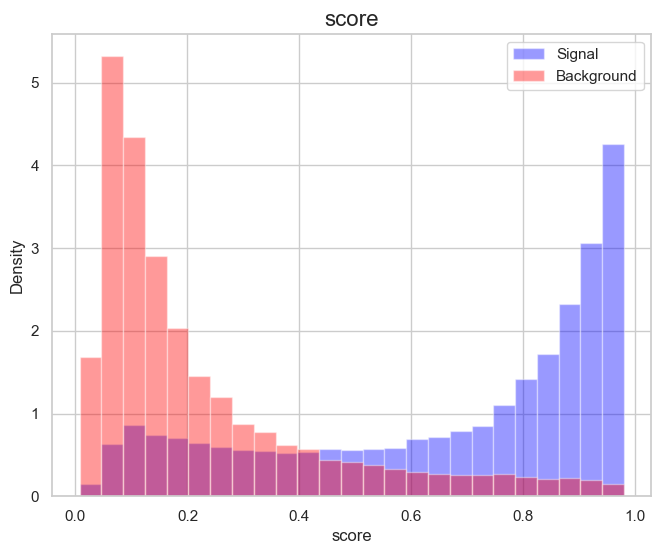

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


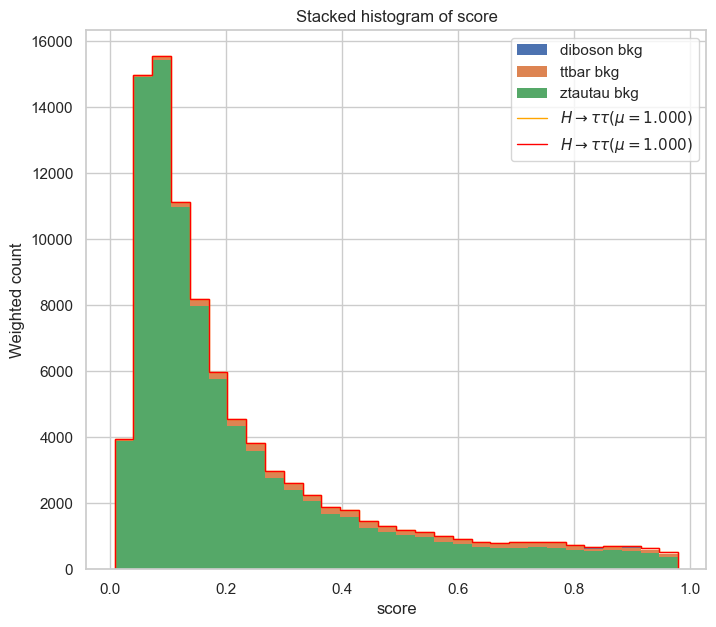

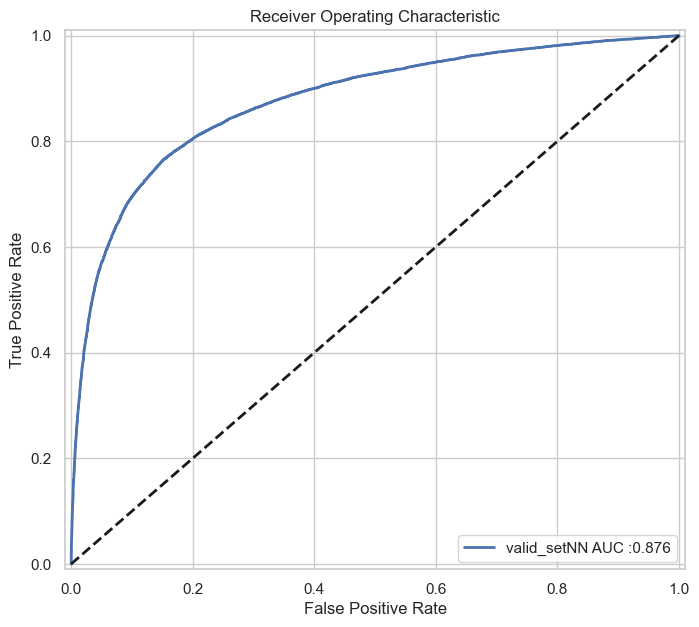

2025-06-05 11:29:49,655 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 11:29:49,655 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.064934330954293


2025-06-05 11:29:50,059 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:29:50,094 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  673.6498498163534
sum_bkg_weights:  105045.35015018364


2025-06-05 11:29:50,494 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:29:50,527 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  672.5920704748977
sum_bkg_weights:  105046.4079295251


2025-06-05 11:29:50,938 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:29:51,011 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  673.9358470418762
sum_bkg_weights:  105045.0641529581
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
11
Epoch 1/11
3125/3125 - 7s - 2ms/step - accuracy: 0.7923 - loss: 2.0145
Epoch 2/11
3125/3125 - 5s - 2ms/step - accuracy: 0.8106 - loss: 1.9052
Epoch 3/11
3125/3125 - 6s - 2ms/step - accuracy: 0.8149 - loss: 1.8805
Epoch 4/11
3125/3125 - 5s - 2ms/step - accuracy: 0.8176 - loss: 1.8616
Epoch 5/11
3125/3125 - 7s - 2ms/step - accuracy: 0.8186 - loss: 1.8529
Epoch 6/11
3125/3125 - 8s - 3ms/step - accuracy: 0.8201 - loss: 1.8388
Epoch 7/11
3125/3125 - 7s - 2ms/step - accuracy: 0.8212 - loss: 1.8312
Epoch 8/11
3125/3125 - 6s - 2ms/step - accuracy: 0.8221 - loss: 1.8195
Epoch 9/11
3125/3125 - 6s - 2ms/step - accuracy: 0.8226 - loss: 1.8127
Epoch 10/11
3125/3125 - 6s - 2ms/step - accuracy: 0.8237 - loss: 1.8056
Epoch 11/11
3125/3125 - 6s - 2ms/step - accuracy: 0.8256 - l

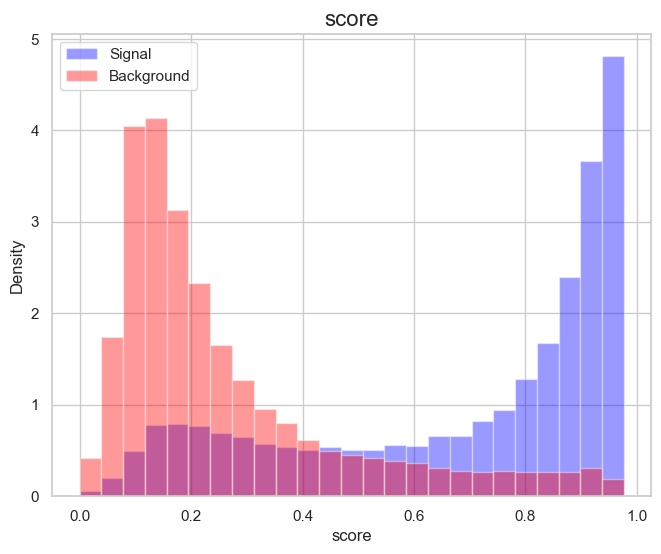

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


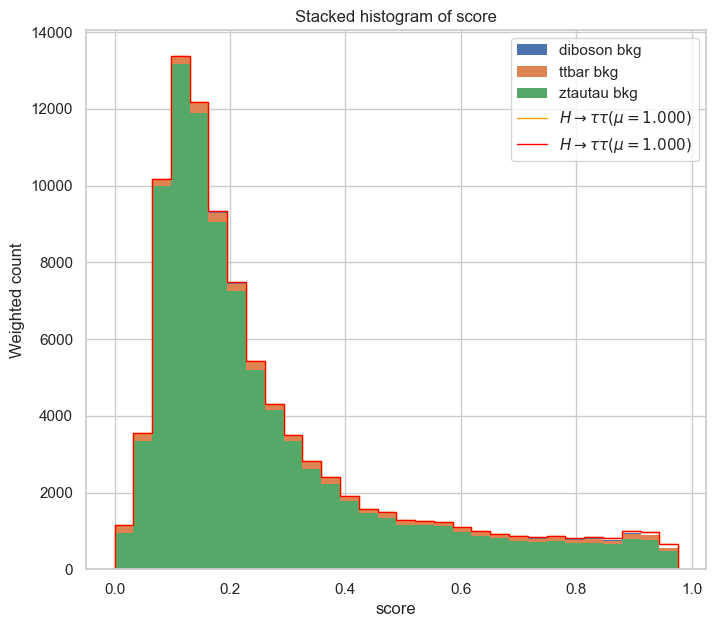

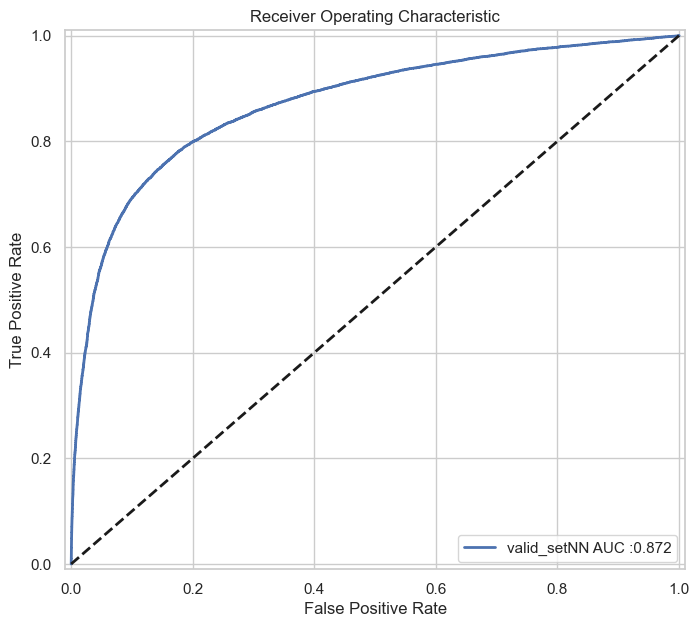

2025-06-05 11:31:15,345 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 11:31:15,345 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.0711942965279797


2025-06-05 11:31:15,697 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:31:15,728 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  675.6203637702511
sum_bkg_weights:  105043.37963622971


2025-06-05 11:31:16,079 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:31:16,095 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  671.5216234097858
sum_bkg_weights:  105047.47837659022


2025-06-05 11:31:16,461 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:31:16,547 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  673.0393948931916
sum_bkg_weights:  105045.96060510677
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
12
Epoch 1/12
3125/3125 - 7s - 2ms/step - accuracy: 0.7870 - loss: 2.0321
Epoch 2/12
3125/3125 - 6s - 2ms/step - accuracy: 0.8050 - loss: 1.9319
Epoch 3/12
3125/3125 - 6s - 2ms/step - accuracy: 0.8081 - loss: 1.9074
Epoch 4/12
3125/3125 - 6s - 2ms/step - accuracy: 0.8113 - loss: 1.8951
Epoch 5/12
3125/3125 - 6s - 2ms/step - accuracy: 0.8134 - loss: 1.8812
Epoch 6/12
3125/3125 - 6s - 2ms/step - accuracy: 0.8144 - loss: 1.8746
Epoch 7/12
3125/3125 - 6s - 2ms/step - accuracy: 0.8166 - loss: 1.8652
Epoch 8/12
3125/3125 - 6s - 2ms/step - accuracy: 0.8173 - loss: 1.8578
Epoch 9/12
3125/3125 - 6s - 2ms/step - accuracy: 0.8178 - loss: 1.8483
Epoch 10/12
3125/3125 - 6s - 2ms/step - accuracy: 0.8189 - loss: 1.8393
Epoch 11/12
3125/3125 - 6s - 2ms/step - accuracy: 0.8190 - 

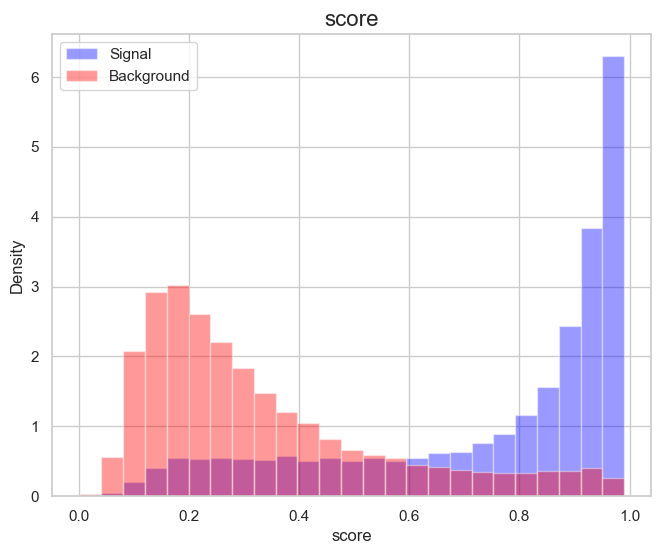

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


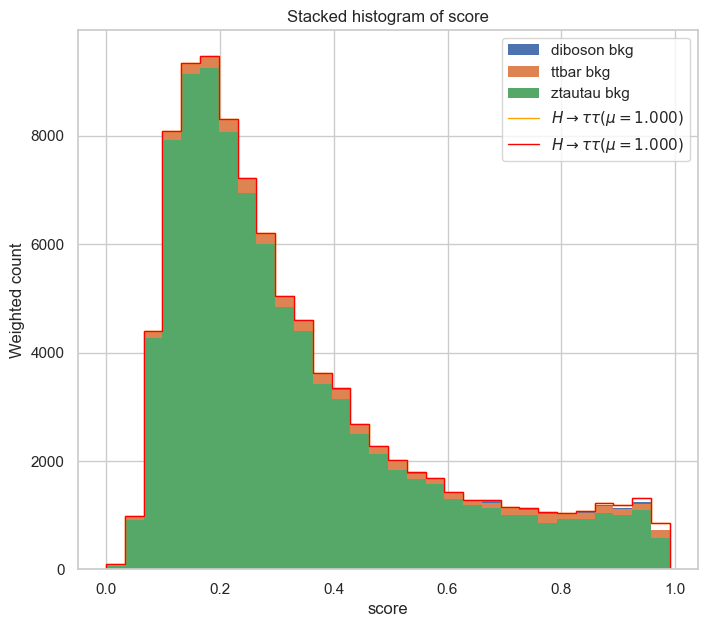

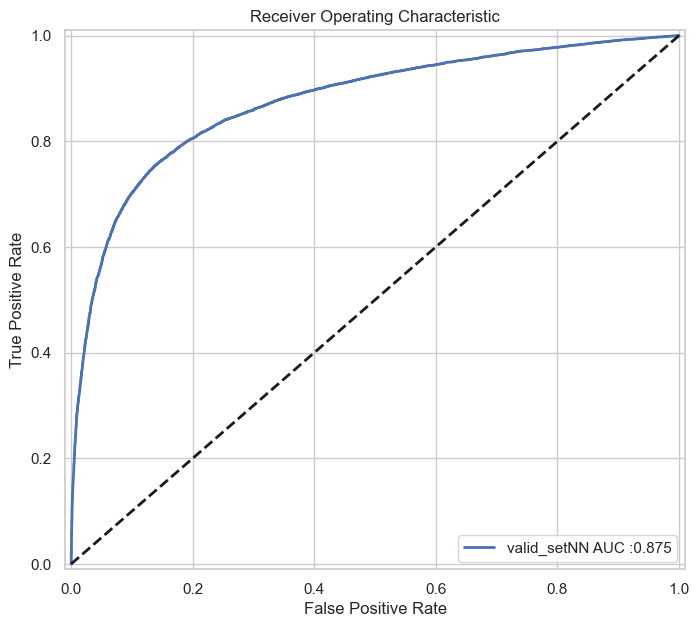

2025-06-05 11:32:42,204 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 11:32:42,211 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.0819694817126386


2025-06-05 11:32:42,615 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:32:42,644 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  685.5497925345157
sum_bkg_weights:  105033.45020746547


2025-06-05 11:32:43,107 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:32:43,132 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  664.614214059607
sum_bkg_weights:  105054.38578594044


2025-06-05 11:32:43,530 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:32:43,590 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  670.1269947524034
sum_bkg_weights:  105048.87300524756
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
13
Epoch 1/13
3125/3125 - 8s - 2ms/step - accuracy: 0.7948 - loss: 1.9983
Epoch 2/13
3125/3125 - 6s - 2ms/step - accuracy: 0.8109 - loss: 1.9048
Epoch 3/13
3125/3125 - 6s - 2ms/step - accuracy: 0.8156 - loss: 1.8784
Epoch 4/13
3125/3125 - 6s - 2ms/step - accuracy: 0.8172 - loss: 1.8586
Epoch 5/13
3125/3125 - 6s - 2ms/step - accuracy: 0.8196 - loss: 1.8475
Epoch 6/13
3125/3125 - 6s - 2ms/step - accuracy: 0.8210 - loss: 1.8306
Epoch 7/13
3125/3125 - 6s - 2ms/step - accuracy: 0.8223 - loss: 1.8241
Epoch 8/13
3125/3125 - 6s - 2ms/step - accuracy: 0.8230 - loss: 1.8113
Epoch 9/13
3125/3125 - 6s - 2ms/step - accuracy: 0.8238 - loss: 1.8043
Epoch 10/13
3125/3125 - 6s - 2ms/step - accuracy: 0.8242 - loss: 1.7968
Epoch 11/13
3125/3125 - 6s - 2ms/step - accuracy: 0.8253 - 

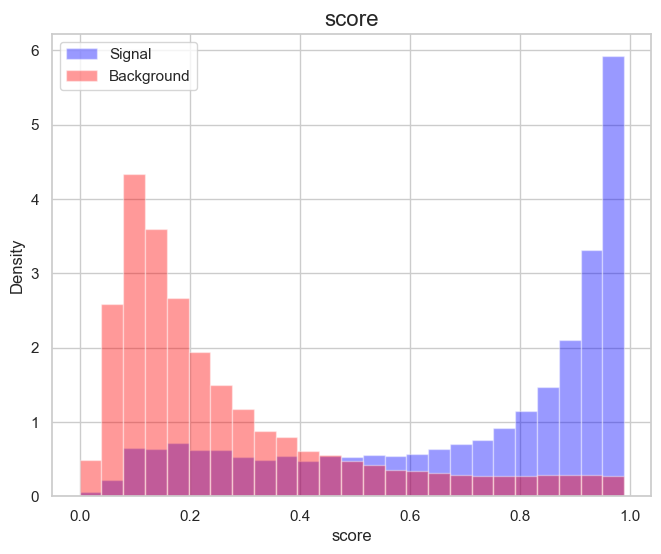

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


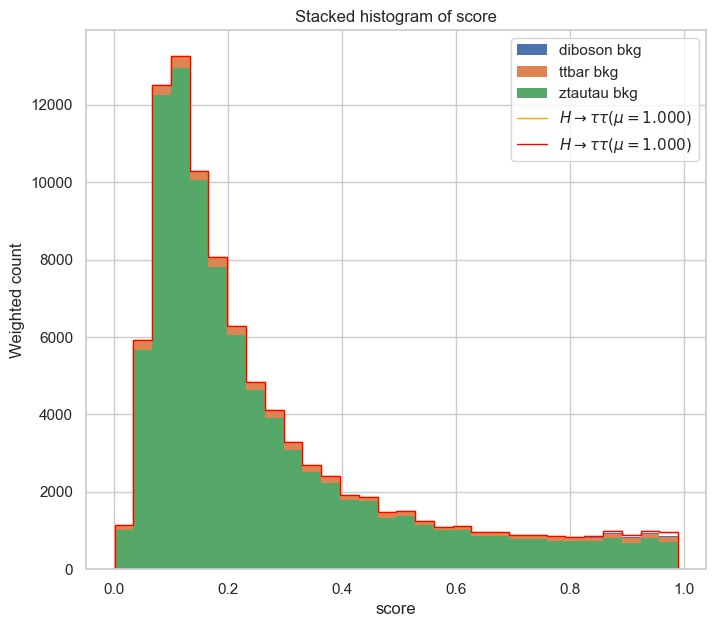

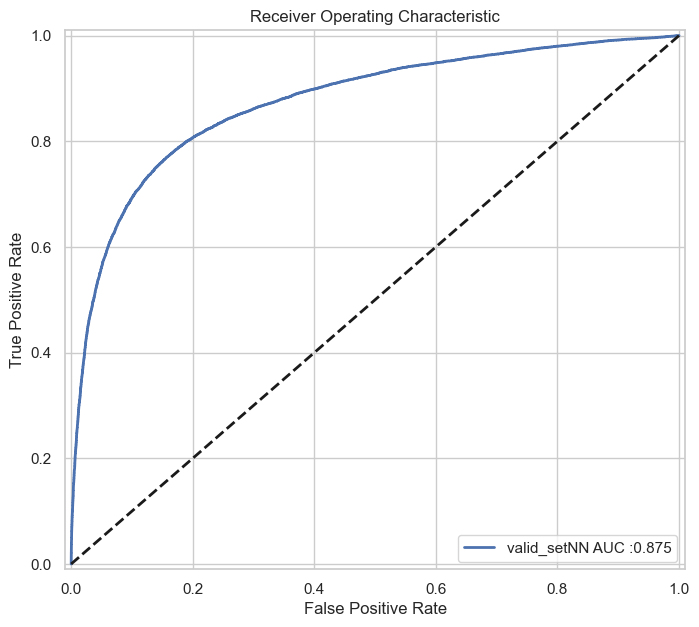

2025-06-05 11:34:17,081 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 11:34:17,081 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.0675507101764556


2025-06-05 11:34:17,448 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:34:17,463 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  684.1902191206401
sum_bkg_weights:  105034.80978087938


2025-06-05 11:34:17,829 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:34:17,846 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  673.1535998842193
sum_bkg_weights:  105045.8464001158


2025-06-05 11:34:18,194 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:34:18,259 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  662.9425782107196
sum_bkg_weights:  105056.05742178926
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
14
Epoch 1/14
3125/3125 - 7s - 2ms/step - accuracy: 0.7914 - loss: 2.0165
Epoch 2/14
3125/3125 - 6s - 2ms/step - accuracy: 0.8068 - loss: 1.9153
Epoch 3/14
3125/3125 - 6s - 2ms/step - accuracy: 0.8109 - loss: 1.8944
Epoch 4/14
3125/3125 - 6s - 2ms/step - accuracy: 0.8127 - loss: 1.8795
Epoch 5/14
3125/3125 - 6s - 2ms/step - accuracy: 0.8159 - loss: 1.8652
Epoch 6/14
3125/3125 - 6s - 2ms/step - accuracy: 0.8167 - loss: 1.8554
Epoch 7/14
3125/3125 - 6s - 2ms/step - accuracy: 0.8167 - loss: 1.8447
Epoch 8/14
3125/3125 - 6s - 2ms/step - accuracy: 0.8194 - loss: 1.8358
Epoch 9/14
3125/3125 - 6s - 2ms/step - accuracy: 0.8201 - loss: 1.8274
Epoch 10/14
3125/3125 - 6s - 2ms/step - accuracy: 0.8214 - loss: 1.8180
Epoch 11/14
3125/3125 - 6s - 2ms/step - accuracy: 0.8226 - 

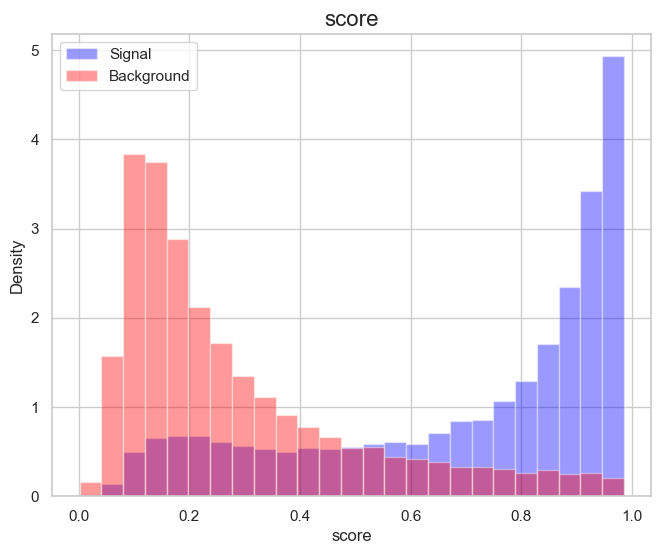

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


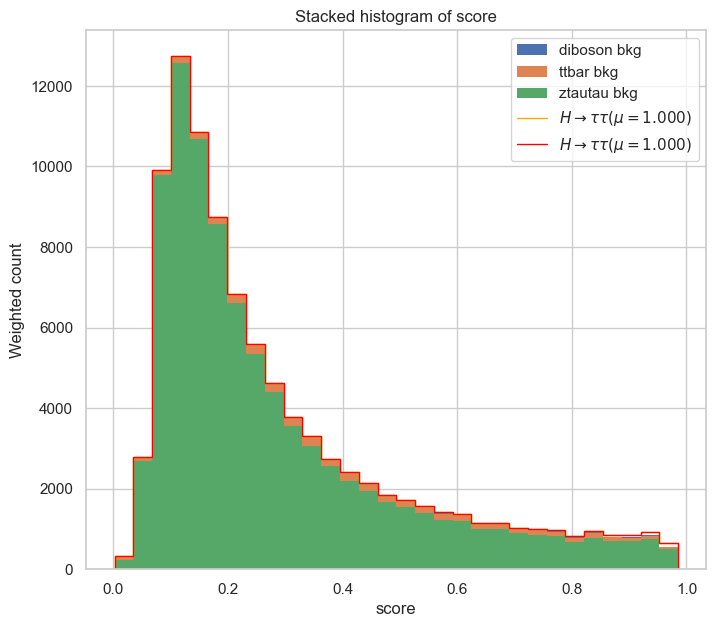

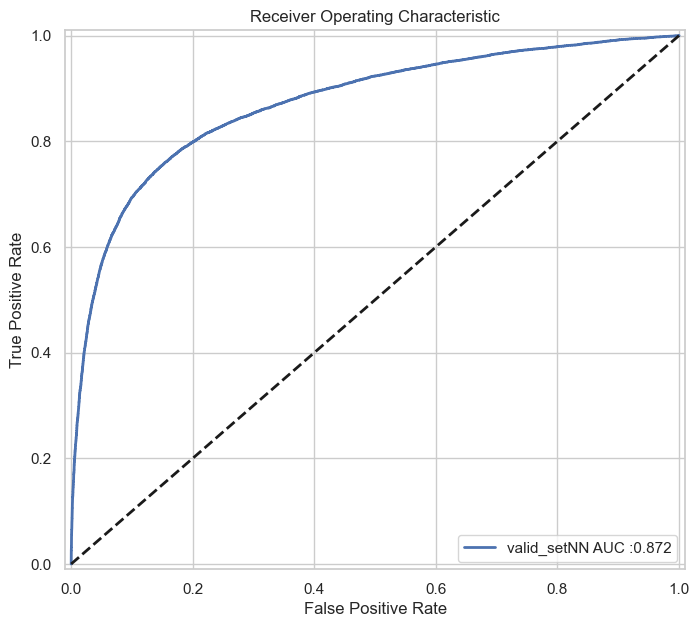

2025-06-05 11:35:53,990 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 11:35:53,997 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.043604801351156


2025-06-05 11:35:54,347 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:35:54,377 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  676.1309148607089
sum_bkg_weights:  105042.86908513929


2025-06-05 11:35:54,726 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:35:54,747 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  664.2278546765976
sum_bkg_weights:  105054.77214532337


2025-06-05 11:35:55,163 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:35:55,221 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  679.8833973018046
sum_bkg_weights:  105039.11660269815
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
15
Epoch 1/15
3125/3125 - 7s - 2ms/step - accuracy: 0.7890 - loss: 2.0400
Epoch 2/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8060 - loss: 1.9325
Epoch 3/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8107 - loss: 1.9116
Epoch 4/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8139 - loss: 1.8966
Epoch 5/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8154 - loss: 1.8805
Epoch 6/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8160 - loss: 1.8706
Epoch 7/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8178 - loss: 1.8606
Epoch 8/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8185 - loss: 1.8512
Epoch 9/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8194 - loss: 1.8428
Epoch 10/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8209 - loss: 1.8351
Epoch 11/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8229 - 

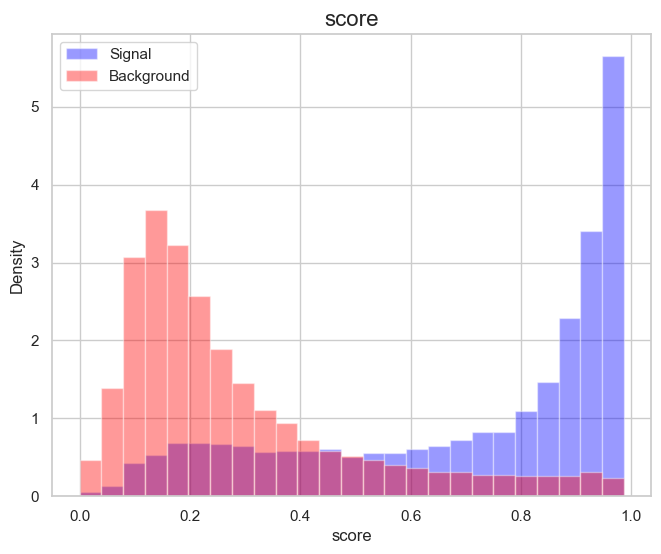

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


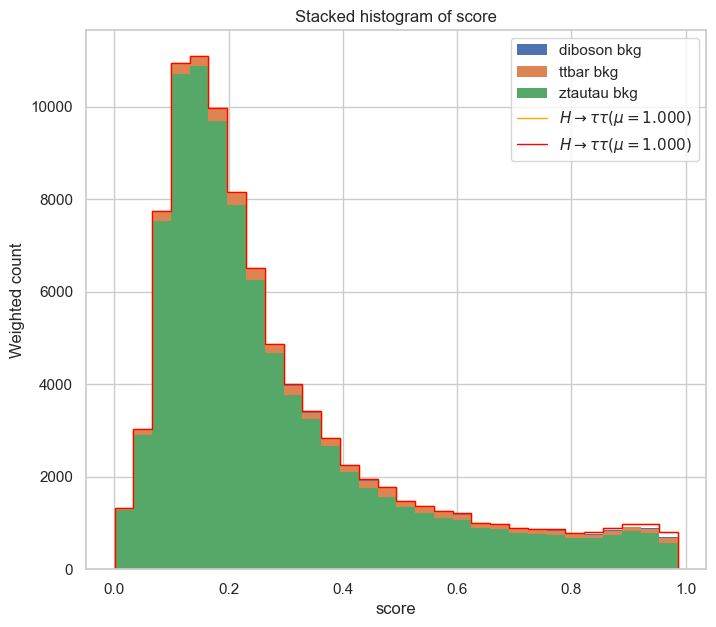

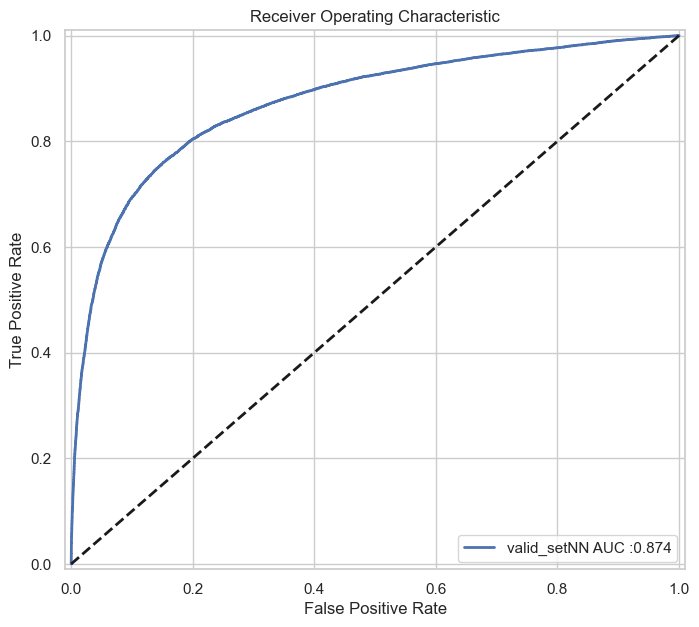

2.0955902036652505


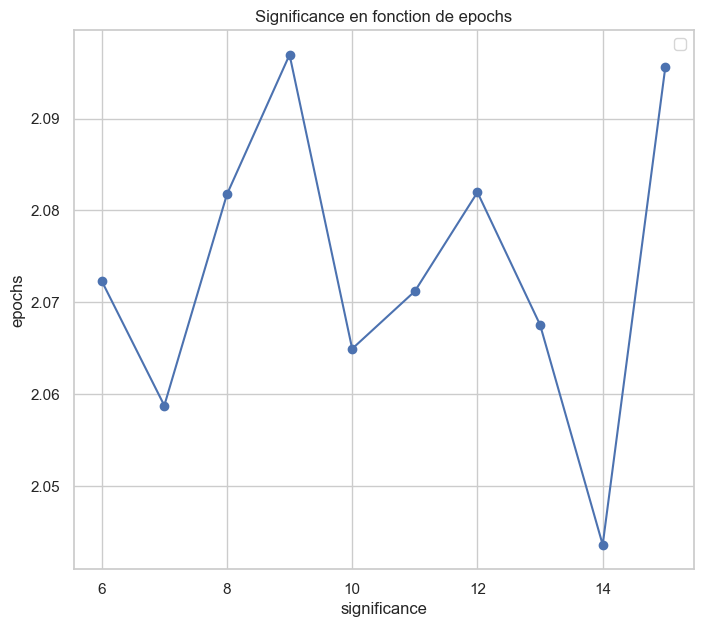

(np.float64(2.0969408217513674), 9)

In [10]:
optimization(data_set)